In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sp.init_printing() # ustawienie ladnego printowaniab

Oscylator harmoniczny z tlumieniem

$\frac{d^2x(t)}{dt^2} = -\omega_0^2 \cdot x(t)-2\beta \cdot \frac{dx(t)}{dt}$

In [2]:
# deklaracja symboli

x = sp.Function('x') # wychylenie
omega0 = sp.Symbol('omega_0', real = True, positive = True) # czestosc drgan wlasnych
t = sp.Symbol('t', real = True) # czas
beta = sp.Symbol('beta', real = True) # wspolczynnik tlumienia

# warunki poczatkowe/brzegowe

x0 = sp.Symbol('x_0', real = True) # wychylenie poczatkowe
v0 = sp.Symbol('v_0', real = True) # predkosc poczatkowa

# rownanie oscylatora tlumionego

eq_tlum = sp.Eq(x(t).diff(t,t), -omega0**2*x(t) - 2*beta*x(t).diff(t))

# rozwiazanie rownania

sol_tlum = sp.dsolve(eq_tlum, x(t), ics = {x(0):x0, x(t).diff(t).subs(t,0):v0})

Rozwiązanie równania oscylatora harmonicznego tłumionego

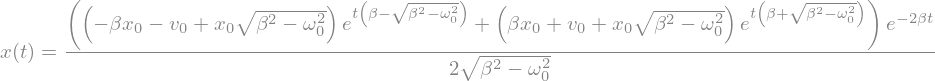

In [3]:
sol_tlum.simplify()

d:\Uczelnia\Przedmioty\Python w zastosowaniach naukowych\Lab7\.venv\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


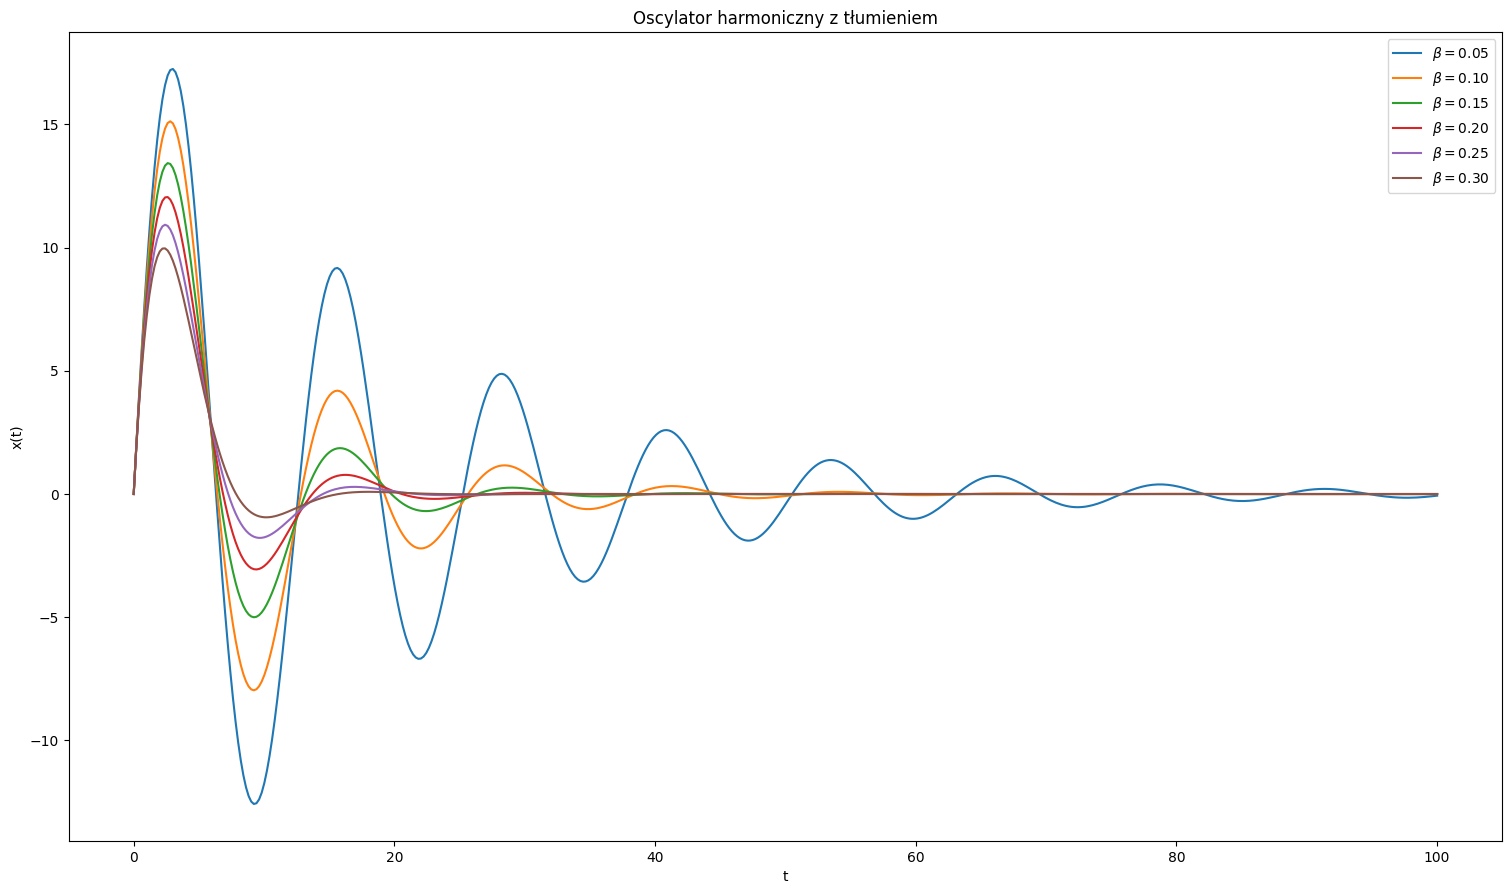

In [4]:
t_linspace = np.linspace(0, 100, 500)

# konwersja do numpy

sol_tlum_beta_0_5 = sp.lambdify(t, sol_tlum.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.05}))
sol_tlum_beta_1 = sp.lambdify(t, sol_tlum.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.10}))
sol_tlum_beta_1_5 = sp.lambdify(t, sol_tlum.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.15}))
sol_tlum_beta_2 = sp.lambdify(t, sol_tlum.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.20}))
sol_tlum_beta_2_5 = sp.lambdify(t, sol_tlum.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.25}))
sol_tlum_beta_3 = sp.lambdify(t, sol_tlum.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.30}))

plt.plot(t_linspace, sol_tlum_beta_0_5(t_linspace), label = r'$\beta = 0.05$')
plt.plot(t_linspace, sol_tlum_beta_1(t_linspace), label = r'$\beta = 0.10$')
plt.plot(t_linspace, sol_tlum_beta_1_5(t_linspace), label = r'$\beta = 0.15$')
plt.plot(t_linspace, sol_tlum_beta_2(t_linspace), label = r'$\beta = 0.20$')
plt.plot(t_linspace, sol_tlum_beta_2_5(t_linspace), label = r'$\beta = 0.25$')
plt.plot(t_linspace, sol_tlum_beta_3(t_linspace), label = r'$\beta = 0.30$')

plt.legend(loc = 'upper right')
plt.title('Oscylator harmoniczny z tłumieniem')
plt.xlabel('t')
plt.ylabel('x(t)')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

Oscylator harmoniczny z wymuszeniem 

$\frac{d^2x(t)}{dt^2} = -\omega_0^2 \cdot x(t) + A \cdot \cos (\omega\cdot t)$

In [5]:
# deklaracja symboli

x = sp.Function('x') # wychylenie
omega0 = sp.Symbol('omega_0', real = True, positive = True) # czestosc drgan wlasnych
t = sp.Symbol('t', real = True) # czas 
A = sp.Symbol('A', real = True) # aplituda wymuszania
omega = sp.Symbol('omega', real = True, positive = True) # czestosc wymuszania
# warunki poczatkowe/brzegowe

x0 = sp.Symbol('x_0', real = True) # wychylenie poczatkowe
v0 = sp.Symbol('v_0', real = True) # predkosc poczatkowa

# rownanie oscylatora tlumionego

eq_wym = sp.Eq(x(t).diff(t,t), -omega0**2*x(t) + A*sp.cos(omega*t))

# rozwiazanie rownania

sol_wym = sp.dsolve(eq_wym, x(t), ics = {x(0):x0, x(t).diff(t).subs(t,0):v0})

Rozwiązanie równania oscylatora harmonicznego z wymuszeniem

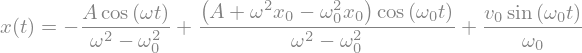

In [6]:
sol_wym

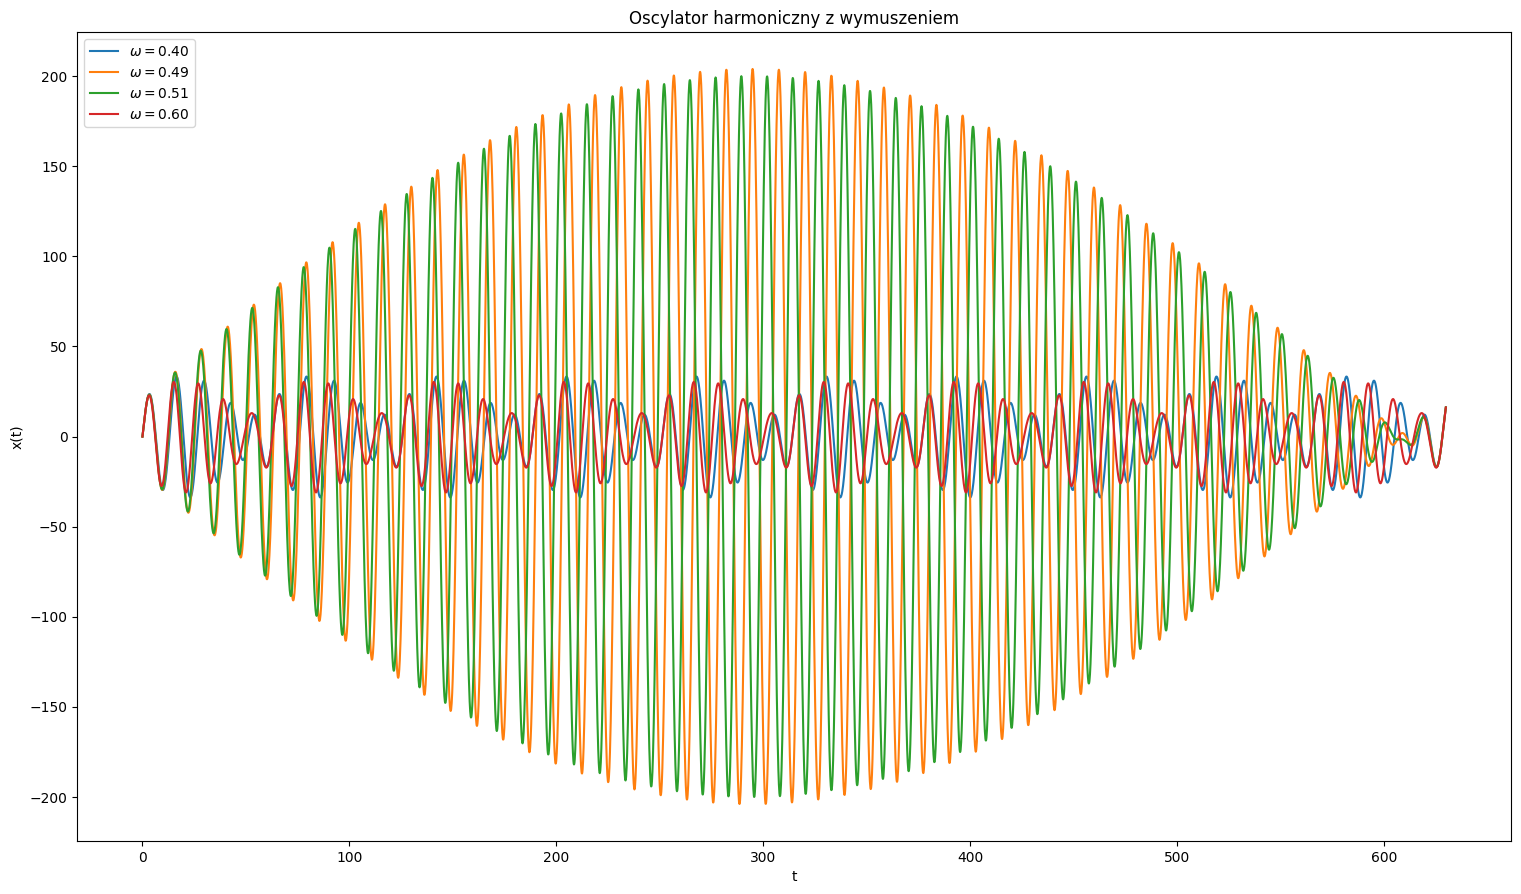

In [7]:
t_linspace = np.linspace(0, 630, 5000)

# konwersja do numpy

sol_wym_omega_040 = sp.lambdify(t, sol_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, A: 1, omega: 0.4}))
sol_wym_omega_049 = sp.lambdify(t, sol_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, A: 1, omega: 0.49}))
sol_wym_omega_051 = sp.lambdify(t, sol_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, A: 1, omega: 0.51}))
sol_wym_omega_060 = sp.lambdify(t, sol_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, A: 1, omega: 0.6}))

plt.clf()

plt.plot(t_linspace, sol_wym_omega_040(t_linspace), label = r'$\omega = 0.40$')
plt.plot(t_linspace, sol_wym_omega_049(t_linspace), label = r'$\omega = 0.49$')
plt.plot(t_linspace, sol_wym_omega_051(t_linspace), label = r'$\omega = 0.51$')
plt.plot(t_linspace, sol_wym_omega_060(t_linspace), label = r'$\omega = 0.60$')

plt.legend(loc = 'upper left')
plt.title('Oscylator harmoniczny z wymuszeniem')
plt.xlabel('t')
plt.ylabel('x(t)')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)

Oscylator harmoniczny z wymuszeniem i tłumieniem

$\frac{d^2x(t)}{dt^2} = -\omega_0^2 \cdot x(t) -2\beta \cdot \frac{dx(t)}{dt} + A \cdot \cos (\omega\cdot t)$

In [8]:
# deklaracja symboli

x = sp.Function('x') # wychylenie
omega0 = sp.Symbol('omega_0', real = True, positive = True) # czestosc drgan wlasnych
t = sp.Symbol('t', real = True) # czas
A = sp.Symbol('A', real = True) # amplituda wymuszania
beta = sp.Symbol('beta', real = True) # wspolczynnik tlumienia
omega = sp.Symbol('omega', real = True, positive = True) # czestosc wymuszania

# warunki poczatkowe/brzegowe

x0 = sp.Symbol('x_0', real = True) # polozenie poczatkowe
v0 = sp.Symbol('v_0', real = True) # predkosc poczatkowa v0 = dx/dt

# rownanie oscylatora tlumionego

eq_tlum_wym = sp.Eq(x(t).diff(t,t), -omega0**2*x(t) - 2*beta*x(t).diff(t) + A*sp.cos(omega*t))

# rozwiazanie rownania

sol_tlum_wym = sp.dsolve(eq_tlum_wym, x(t), ics = {x(0):x0, x(t).diff(t).subs(t,0):v0})

Rozwiązanie równania oscylatora harmonicznego z tłumieniem i wymuszeniem

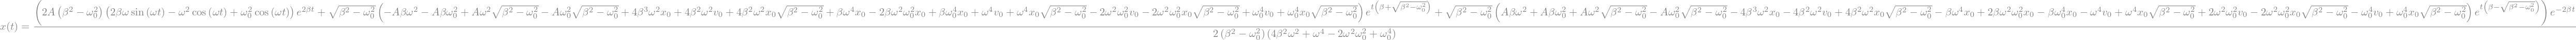

In [9]:
sol_tlum_wym.simplify()


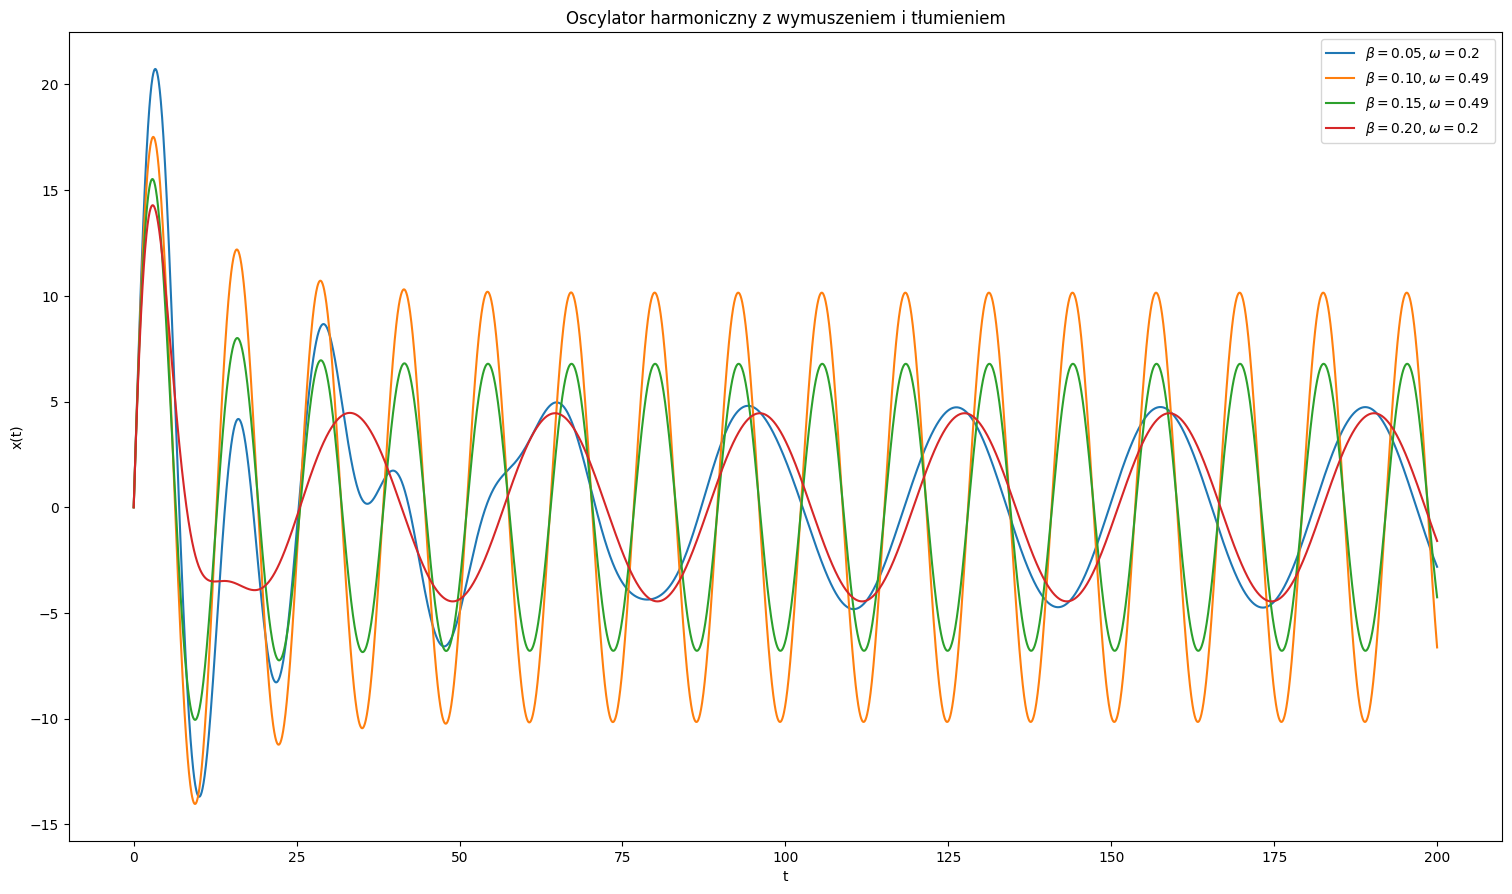

In [10]:
t_linspace = np.linspace(0, 200, 5000)

# konwersja do numpy

sol_beta_0_5_omega_040 = sp.lambdify(t, sol_tlum_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.05, A:1, omega: 0.2}))
sol_beta_1_omega_049 = sp.lambdify(t, sol_tlum_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.1, A:1, omega: 0.49}))
sol_beta_1_5_omega_051 = sp.lambdify(t, sol_tlum_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.15, A:1, omega: 0.49}))
sol_beta_2_omega_060 = sp.lambdify(t, sol_tlum_wym.rhs.subs({x0: 0, v0: 10, omega0: 0.5, beta: 0.2, A:1, omega: 0.2}))

plt.clf()

plt.plot(t_linspace, sol_beta_0_5_omega_040(t_linspace), label = r'$\beta = 0.05,\omega = 0.2$')
plt.plot(t_linspace, sol_beta_1_omega_049(t_linspace), label = r'$\beta = 0.10, \omega = 0.49$')
plt.plot(t_linspace, sol_beta_1_5_omega_051(t_linspace), label = r'$\beta = 0.15, \omega = 0.49$')
plt.plot(t_linspace, sol_beta_2_omega_060(t_linspace), label = r'$\beta = 0.20, \omega = 0.2$')

plt.legend(loc = 'upper right')
plt.title('Oscylator harmoniczny z wymuszeniem i tłumieniem')
plt.xlabel('t')
plt.ylabel('x(t)')


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)